In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
from stl import mesh

C:\Users\Jared\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


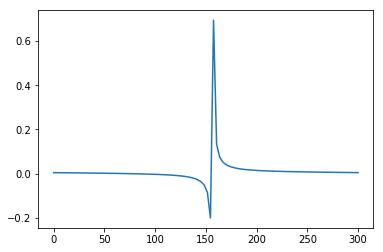

In [2]:
freqs = np.linspace(1,1, 100)
a_n = 1
t = np.linspace(0,300, 100)

fftarray = a_n * np.exp(1j*freqs*t)
signal = np.fft.ifft(fftarray)

plt.plot(t, signal)

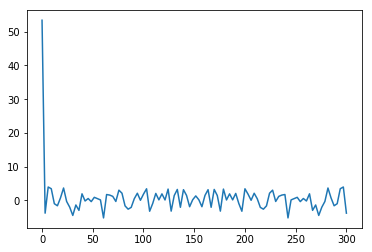

In [3]:
noise = np.random.rand(100)
fftnoise = np.fft.fft(noise)
plt.plot(t, fftnoise)

300


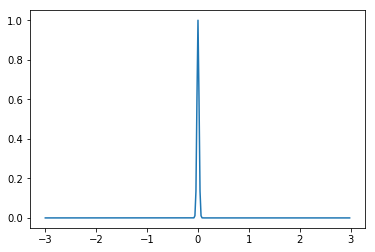

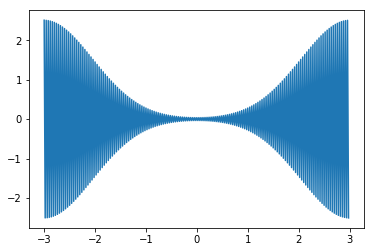

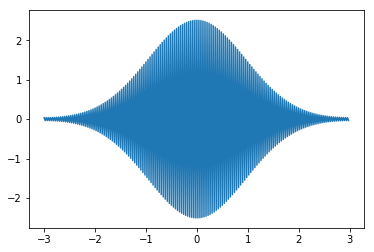

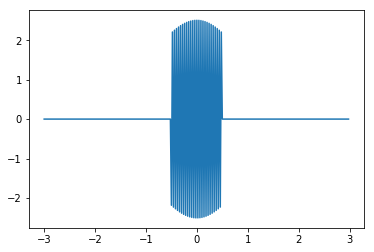

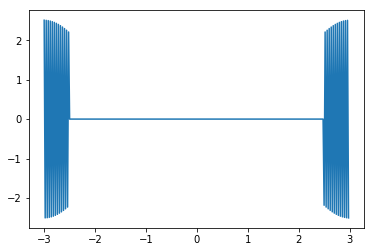

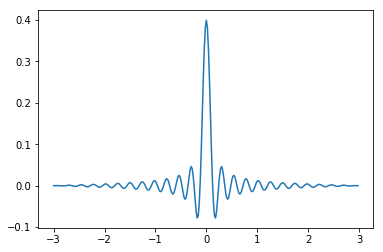

In [4]:
# make a function that uses some higher frequency components to eventually filter out
x = np.arange(-3,3,0.02)
#x = np.linspace(-3,3,200)
sig = 0.02
mu = 0
gauss = np.exp(-( (x-mu)**2 / ( 2.0 * sig**2 ) ) ) 
# take fft of function
gauss_fft = np.fft.fft(gauss)
# shift the fft to 0 frequency
gauss_shift = np.fft.fftshift(gauss_fft)
plt.plot(x, gauss)
plt.figure()
plt.plot(x, gauss_fft)
plt.figure()
plt.plot(x, gauss_shift)

# make a low-pass filter
lpf = np.zeros(len(x))
wc = np.arange(-1,1,0.02)
print(len(x))
#wc = np.where(x<) #cutoff freq
#lpf[100:200] = 1
lpf[150-25:150+25] = 1

# multiply lp filter by shifted fft
fft_lp = gauss_shift * lpf
plt.figure()
plt.plot(x, fft_lp)

# unshift the filtered fft
fft_lp_unshift = np.fft.ifftshift(fft_lp)
plt.figure()
plt.plot(x, fft_lp_unshift)

# inverse fft of filtered and unshifted fft to regenerate filtered signal
gauss_lp = np.fft.ifft(fft_lp_unshift)
plt.figure()
plt.plot(x, gauss_lp)



#sig = np.sin(x)
#plt.plot(x, sig)
#sig_fft = np.fft.fft(sig)
#sig_shift = np.fft.fftshift(sig_fft)
#plt.figure()
#plt.plot(x, sig_fft)
#plt.plot(x, sig_shift.imag)


#wn = np.random.uniform(-1, 1, (250,250))
#need to add random complex components?
#plt.figure()
#plt.imshow(wn)

#wn_fft = np.fft.fft(wn)
#plt.figure()
#plt.imshow(wn_fft.imag)
#wn_shift = np.fft.fftshift(wn)
#plt.figure()
#plt.imshow(wn_shift)


## REPEAT WITH 1-D NOISE

36


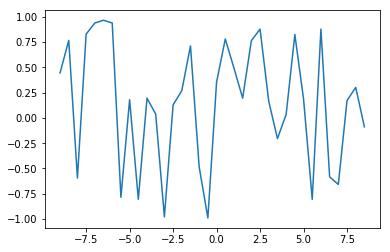

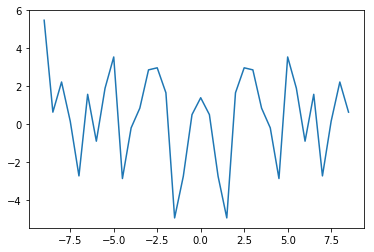

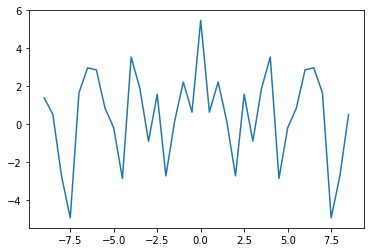

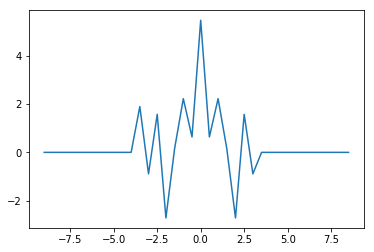

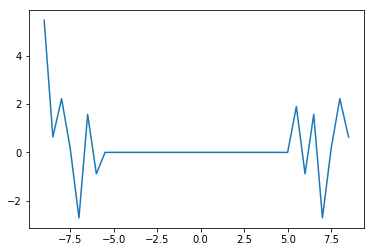

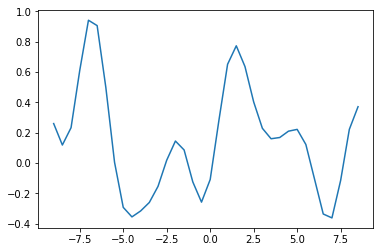

In [5]:
###   What is the frequency domain scale? I keep using the "x" vals since it will have hte same size - but wrong values
N = 36
L = 9 #length of side of sample
dL = L/N
wc = 7

x = np.arange(-L,L,2*dL) #eventually make this 0 to L

wn1d = np.random.uniform(-1,1,N)
plt.figure()
plt.plot(x, wn1d)

wn1d_fft = np.fft.fft(wn1d)
plt.figure()
plt.plot(x, wn1d_fft)

wn1d_shift = np.fft.fftshift(wn1d_fft)
plt.figure()
plt.plot(x, wn1d_shift)

lpf = np.zeros(len(x))
#wc = np.arange(-1,1,0.02)
print(len(x))
#wc = np.where(x<) #cutoff freq
#lpf[100:200] = 1
lpf[np.int((N/2)-wc):np.int((N/2)+wc)] = 1

fftwn1d_lp = lpf*wn1d_shift
plt.figure()
plt.plot(x, fftwn1d_lp)

fftwn1d_lp_unshift = np.fft.ifftshift(fftwn1d_lp)
plt.figure()
plt.plot(x, fftwn1d_lp_unshift)

wn1d_lp = np.fft.ifft(fftwn1d_lp_unshift)
plt.figure()
plt.plot(x, wn1d_lp)

## 2-D NOISE

0.5


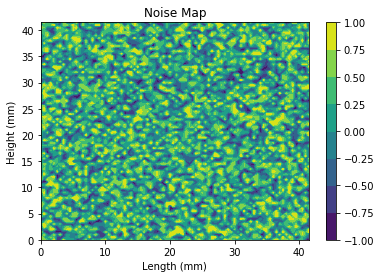

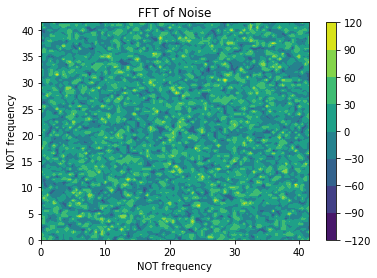

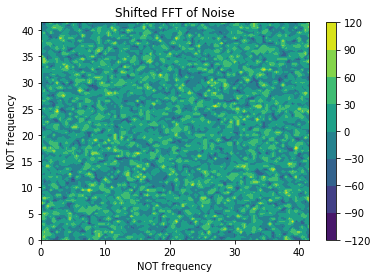

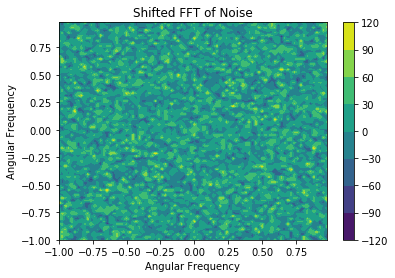

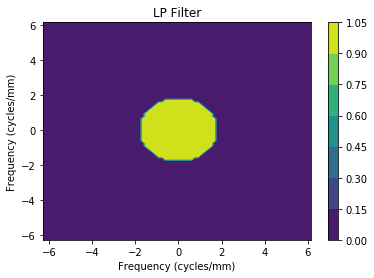

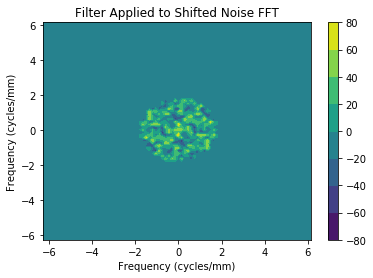

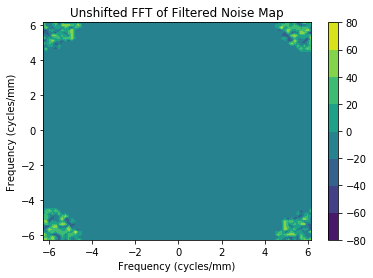

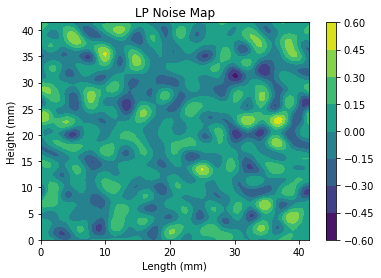

In [9]:
### INITIALIZE ###
L = 42 #length of side of sample - mm - 81mm
H = 42 # mm - should be something like 42mm
Nl = L * 2 #would L*2 be the Nyquist?
Nh = H * 2
dL = L/Nl #space between sample points
dH = H/Nh #these are equal - as they should be (?)
#print(dL,dH)
f = 75 #Hz or cycles/mm
wc = f / (2*np.pi) #rad/sec or rad/mm
amp = 1 #amplitude +/- of noise


x = np.arange(0,L,dL)
y = np.arange(0,H,dH)
X,Y = np.meshgrid(x,y)

### ESTABLISH NOISE MAP ###
wn2d = np.random.uniform(-amp,amp,(Nh,Nl))
plt.figure()
plt.contourf(X,Y,wn2d)
plt.colorbar()
plt.title("Noise Map")
plt.xlabel("Length (mm)")
plt.ylabel("Height (mm)")

### TAKE 2D FFT ###
wn2d_fft = np.fft.fft2(wn2d)
plt.figure()
plt.contourf(X,Y,wn2d_fft)
plt.colorbar()
plt.title("FFT of Noise")
plt.xlabel("NOT frequency")
plt.ylabel("NOT frequency")

### SHIFT THE FFT TO 0 ###
wn2d_shift = np.fft.fftshift(wn2d_fft)
plt.figure()
plt.contourf(X,Y,wn2d_shift)
plt.colorbar()
plt.title("Shifted FFT of Noise")
plt.xlabel("NOT frequency")
plt.ylabel("NOT frequency")

### CONVERT TO FERQUENCY AXIS DOMAIN ### I SUSPECT HERE IS WHERE THE ASYMMETRY HAPPENS
#freq bins - THESE NEED CHECKED
print(dL)
#freqs = np.fft.fftfreq((len(x),len(y)))
freqx = np.fft.fftshift(np.fft.fftfreq(x.shape[0],dL))
freqy = np.fft.fftshift(np.fft.fftfreq(y.shape[0],dH))
fX,fY = np.meshgrid(freqx, freqy)
#print(freqx)
#print(freqy)
plt.figure()
plt.contourf(fX,fY,wn2d_shift)
plt.colorbar()
plt.title("Shifted FFT of Noise")
plt.xlabel("Angular Frequency")
plt.ylabel("Angular Frequency")

### MAKE THE LP FILTER ###
#make lp filter - am i forgetting about the imaginary components?
rows, cols = wn2d.shape
crow, ccol = int(rows/2), int(cols/2)
#lpf = np.zeros((rows, cols, 2))
lpf = np.zeros((rows, cols))
center = [crow, ccol]
xlpf, ylpf = np.ogrid[:rows, :cols]
lpf_area = (xlpf - center[0])**2 + (ylpf - center[1])**2 <= wc**2
lpf[lpf_area] = 1
#print(lpf)
plt.figure()
plt.contourf(2*np.pi*freqx, 2*np.pi*freqy,lpf) #scaled from angular freq to Hz
plt.colorbar()
plt.title("LP Filter")
plt.xlabel("Frequency (cycles/mm)")
plt.ylabel("Frequency (cycles/mm)")

### APPLY THE FILTER TO THE SHIFTED FFT ###
fftwn2d_lp = lpf*wn2d_shift
plt.figure()
plt.contourf(2*np.pi*fX, 2*np.pi*fY, fftwn2d_lp)
plt.colorbar()
plt.title("Filter Applied to Shifted Noise FFT")
plt.xlabel("Frequency (cycles/mm)")
plt.ylabel("Frequency (cycles/mm)")

### UNSHIFT THE FILTERED FFT ###
fftwn2d_lp_unshift = np.fft.ifftshift(fftwn2d_lp)
plt.figure()
plt.contourf(2*np.pi*fX, 2*np.pi*fY, fftwn2d_lp_unshift)
plt.colorbar()
plt.title("Unshifted FFT of Filtered Noise Map")
plt.xlabel("Frequency (cycles/mm)")
plt.ylabel("Frequency (cycles/mm)")

### TAKE THE INVERSE FFT TO GET A FILTERED SIGNAL BACK ###
wn2d_lp = np.fft.ifft2(fftwn2d_lp_unshift)
plt.figure()
plt.contourf(X,Y,wn2d_lp)
plt.colorbar()
plt.title("LP Noise Map")
plt.xlabel("Length (mm)")
plt.ylabel("Height (mm)")

np.save('Random_Maps/wn2d_L42_W42_fc75_A1.npy', wn2d_lp)
# np.save('outputs/materials/' + material_name +'/' + str(angle) + '_degX.npy', values_x)
#wn2d_lp_real = wn2d_lp.real
#wn2d_lp_real = ['{:f}'.format(item) for item in wn2d_lp_real]

#np.savetxt('lptest.txt', wn2d_lp.real, delimiter=',', fmt='%f')
#print(float(wn2d_lp.real))

## DERIVATIVES OF SURFACE

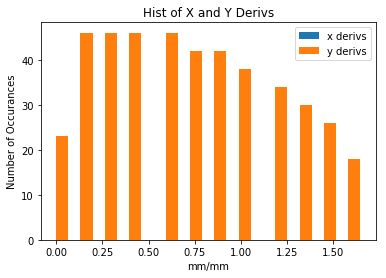

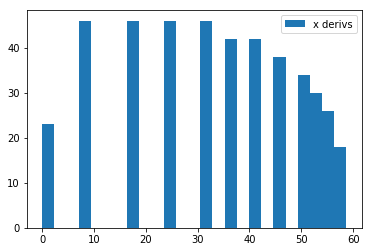

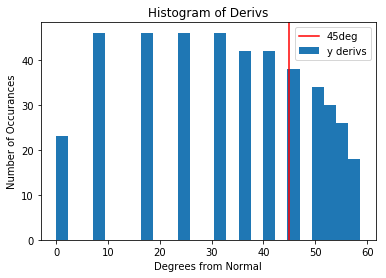

In [39]:
#print(fftwn2d_lp) #Freq space after filtering - COMPLEX VALUES
#freqx and freqy...fX, fY
freq_idx = fftwn2d_lp != 0
x_deriv = np.abs(2*np.pi * fX[freq_idx])
plt.hist(x_deriv,25, label='x derivs')
#plt.figure() #UNCOMMENT TO SEE THE OVERLAP/THE LACK THEREOF
y_deriv = np.abs(2*np.pi * fY[freq_idx])
plt.hist(y_deriv,25, label='y derivs')
plt.title("Hist of X and Y Derivs")
plt.xlabel("mm/mm")
plt.ylabel("Number of Occurances")
plt.legend()

deriv2deg_x = np.rad2deg(np.arctan(x_deriv))
deriv2deg_y = np.rad2deg(np.arctan(y_deriv))
plt.figure()
plt.hist(deriv2deg_x,25, label='x derivs') #make 25 bins to see weird effect
plt.legend()
plt.figure() #UNCOMMENT TO SEE THE OVERLAP/THE LACK THEREOF
plt.hist(deriv2deg_y,25, label='y derivs')
plt.axvline(45, color='r', label='45deg')
plt.title("Histogram of Derivs")
plt.xlabel("Degrees from Normal")
plt.ylabel("Number of Occurances")
plt.legend()

#plt.figure()
#plt.hist(deriv2deg_x+deriv2deg_y,25) #make 25 bins to see weird effect
#plt.axvline(45, color='r', label='45deg')
#plt.title("Hist of Derivs")
#plt.xlabel("Degrees from Normal")
#plt.ylabel("Number of Occurances")
#plt.legend()

## RMS OF THE NOISE

In [40]:
# noise orig = wn2d
# noise filtered = wn2d_lp
print(wn2d.shape)
#ybar_size = wn2d.shape
#ybar = np.zeros((ybar_size[0], ybar_size[1]))
n = len(x) * len(y)
nx = len(x)
ny = len(y)

#diff = np.zeros((ybar_size[0], ybar_size[1]))
summation = 0

for i in range(ny):
    for j in range(nx):
        diff = (wn2d[i,j] - 0)**2
        summation = summation + diff
RMSE = np.sqrt(summation / n)

#RMS in x - does across columns first then down rows
summation2 = 0
for i in range(ny):
    for j in range(nx):
        diff2 = (wn2d_lp.real[i,j] - 0)**2 ###SHOULD I ONLY USE THE REAL HERE?
        summation2 = summation2 + diff2
RMSE2 = np.sqrt(summation2 / n)

#RMS y
summation3 = 0
for i in range(nx):
    for j in range(ny):
        diff3 = (wn2d_lp.real[j,i] - 0)**2 ###SHOULD I ONLY USE THE REAL HERE?
        summation3 = summation3 + diff3
RMSE3 = np.sqrt(summation3 / n)

print("RMS of Initial Noise Map",RMSE)
print("RMS of Filtered Noise Map",RMSE2)
print("The other direction RMS of Filtered Noise Map",RMSE3)
print("Difference in RMS x and y",RMSE3-RMSE2)

(84, 84)
RMS of Initial Noise Map 0.5804189787885801
RMS of Filtered Noise Map 0.14691528743494683
The other direction RMS of Filtered Noise Map 0.14691528743494692
Difference in RMS x and y 8.326672684688674e-17
